In [25]:
# CODE ADAPTED FROM https://github.com/losc-tutorial/quickview/blob/master/index.ipynb

# -- Set a GPS time:
t0 = 1187008882.4    # -- GW170817
t1 = 1262276684.0    # -- GW200105_162426


#-- Choose detector as H1, L1, or V1
detector = 'H1'

In [2]:
import requests, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('text.latex', preamble=r'''\usepackage{amsmath}
          \usepackage{physics}
          \usepackage{siunitx}
          ''')
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
    from gwpy.frequencyseries import FrequencySeries
except:
    ! pip install -q gwpy
    from gwpy.frequencyseries import FrequencySeries
    from gwpy.timeseries import TimeSeries  

In [28]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]
url1 = get_urls('L1', t1, t1)[-1]

# print('Downloading: ' , url)
fn = os.path.basename(url)
fn1 = os.path.basename(url1)
with open(fn1,'wb') as strainfile:
    straindata = requests.get(url1)
    strainfile.write(straindata.content)

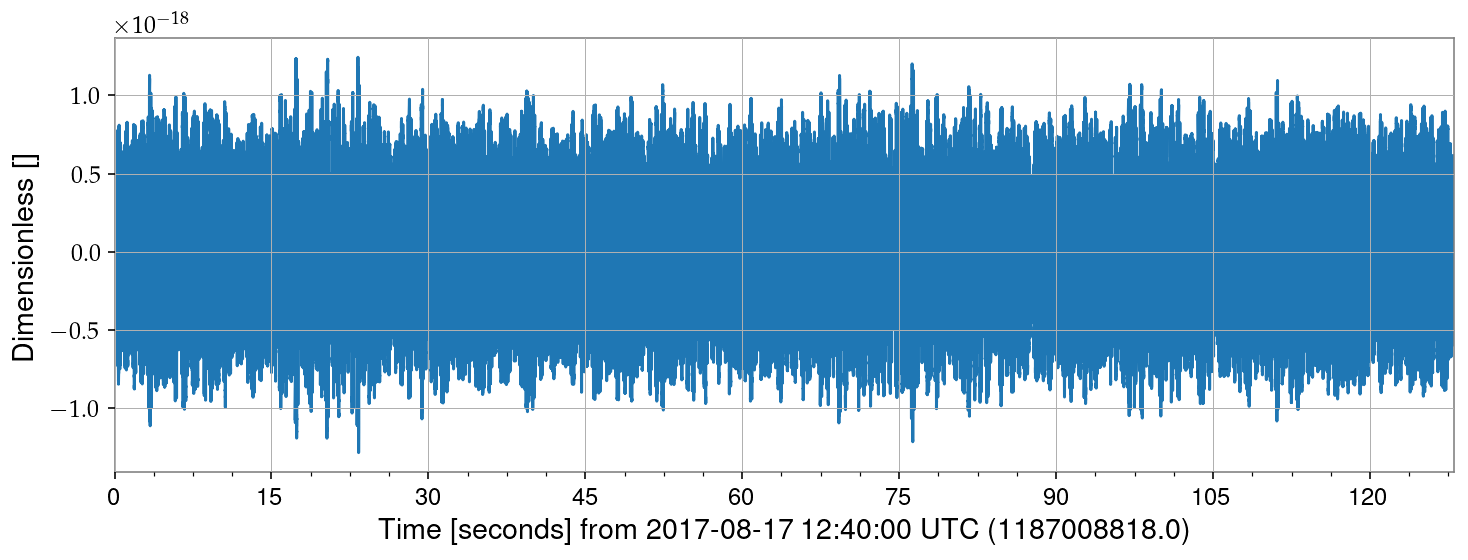

In [8]:
# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.losc')
center = int(t0)
strain = strain.crop(center-64, center+64)
fig1 = strain.plot()

In [ ]:
strain1 = TimeSeries.read(f1,format='hdf5.losc')
center1 = int(t1)
strain1 = strain1.crop(center1-64, center1+64)


In [9]:
from pycbc.waveform import get_fd_waveform

psd = strain.psd(fftlength=8)
psd1 = strain1.psd(fftlength=8)

# hp_pycbc, _ = get_fd_waveform(
#     approximant="TaylorF2", 
#     mass1=1.2, 
#     mass2=1.5, 
#     distance=40, 
#     f_lower=10,
#     f_final=2000, 
#     delta_f=psd.df.value)

# hp = FrequencySeries.from_pycbc(hp_pycbc)
# freqs2 = hp.frequencies



(1e-24, 1e-18)

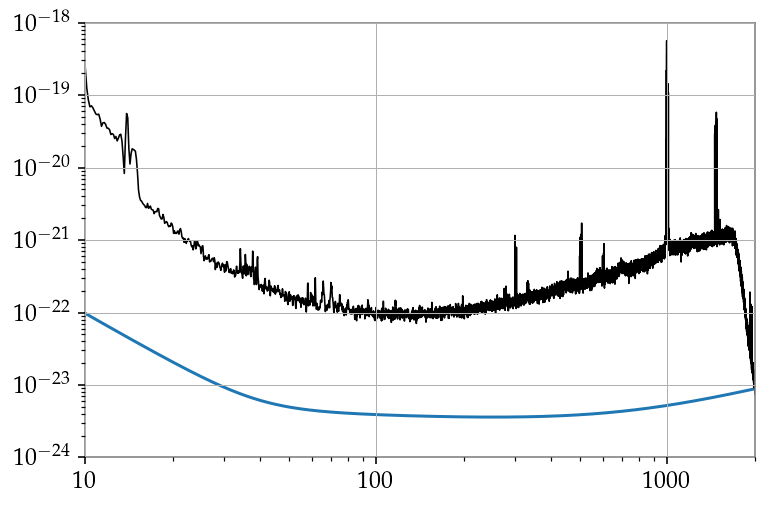

In [24]:
Sa_n = strain.asd(fftlength=8)
Sa_n1 = strain1.asd(fftlength=8)
f = Sa_n.frequencies

maxf = max(f).value
df = (f[1]-f[0]).value

from pycbc.psd.analytical import aLIGOZeroDetHighPower
LIGO_PSD_HIGH_SAMPLING = aLIGOZeroDetHighPower(
    length=int( maxf / df  + 1),
    delta_f=df,
    low_freq_cutoff=0)

LIGO_PSD_HIGH_SAMPLING.at_frequencies = np.vectorize(LIGO_PSD_HIGH_SAMPLING.at_frequency)

S_th = LIGO_PSD_HIGH_SAMPLING.at_frequencies(f.value)

plt.loglog(f, np.sqrt(S_th))

plt.loglog(f, Sa_n, lw=.8)
plt.loglog(Sa_n1, Sa_n1, lw=.8)

# ax = plt.gca()
# ax2 = ax.twinx()
# ax2.loglog(f, Sa_n, c='black', label='Noise ASD', lw=.3)

lims_y = (1e-24, 1e-18)
lims_x = (10, 2000)
plt.xlim(lims_x)
plt.ylim(lims_y)
# for a in [ax, ax2]:
#     a.set_xlim(*lims_x)
#     a.set_ylim(*lims_y)


0.375

In [ ]:
Sa_n = strain.asd(fftlength=8)
f = Sa_n.frequencies

(Sa_n * np.sqrt(f)).plot(c='black', label='Noise char strain')

# import sys
# sys.path.append('home/jacopo/Documents/masters/bajes')
# from bajes.obs.gw.approx.taylorf2 import Af3hPN

# h = Af3hPN(f, 1.2+1.5, eta=0.246, Deff=40)

# plt.plot(f, 2 * f * abs(h), c='black', ls=':', label='theoretical waveform')

plt.xlim(10, 2000)
plt.yscale('log')
plt.ylabel('Characteristic strain [dimensionless]')
plt.legend()

In [ ]:
# -- Plot ASD
fig2 = strain.asd(fftlength=8).plot(c='black')
plt.ylabel('Amplitude Spectral Density [Hz$^{-1/2}$]')
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

(1187008881.4, 1187008882.5)

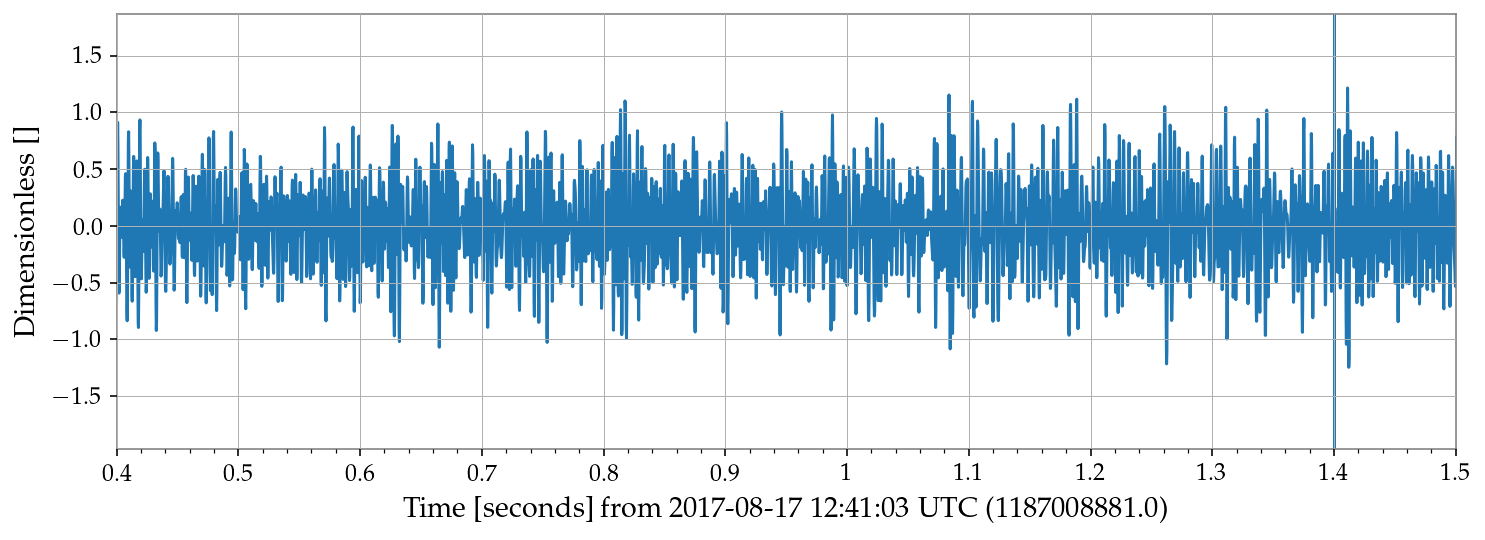

In [21]:
# -- Whiten and bandpass data

time_range = (t0 - 1, t0+.1)

white_data = strain.whiten()
bp_data = white_data.bandpass(200, 600)
fig3 = bp_data.plot()
plt.axvline(t0)

plt.xlim(*time_range)

(10, 1000)

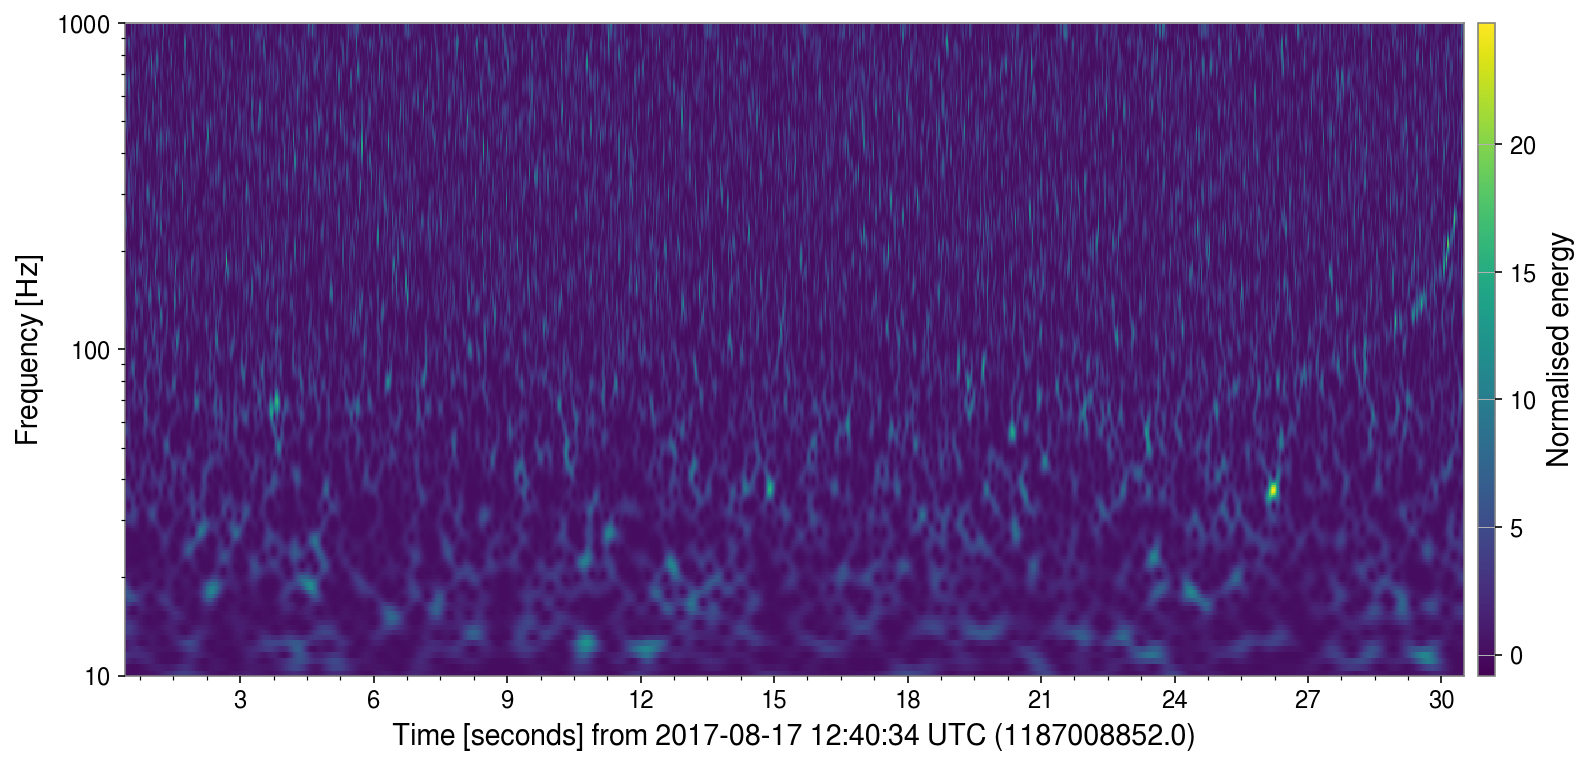

In [11]:
hq = strain.q_transform(
    outseg=time_range, 
    whiten=strain.asd(fftlength=8),
    q_range=(4, 16)
)
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')
plt.xlim(*time_range)
plt.ylim(10, 1000)

In [53]:
from pycbc.waveform import td_approximants, fd_approximants

# List of fd approximants that are currently available
for x in fd_approximants(): print(x)

EccentricFD
TaylorF2
TaylorF2Ecc
TaylorF2NLTides
TaylorF2RedSpin
TaylorF2RedSpinTidal
SpinTaylorF2
EOBNRv2_ROM
EOBNRv2HM_ROM
SEOBNRv1_ROM_EffectiveSpin
SEOBNRv1_ROM_DoubleSpin
SEOBNRv2_ROM_EffectiveSpin
SEOBNRv2_ROM_DoubleSpin
SEOBNRv2_ROM_DoubleSpin_HI
Lackey_Tidal_2013_SEOBNRv2_ROM
SEOBNRv4_ROM
SEOBNRv4HM_ROM
SEOBNRv4_ROM_NRTidal
SEOBNRv4_ROM_NRTidalv2
SEOBNRv4_ROM_NRTidalv2_NSBH
SEOBNRv4T_surrogate
IMRPhenomA
IMRPhenomB
IMRPhenomC
IMRPhenomD
IMRPhenomD_NRTidal
IMRPhenomD_NRTidalv2
IMRPhenomNSBH
IMRPhenomHM
IMRPhenomP
IMRPhenomPv2
IMRPhenomPv2_NRTidal
IMRPhenomPv2_NRTidalv2
SpinTaylorT4Fourier
SpinTaylorT5Fourier
NRSur4d2s
IMRPhenomXAS
IMRPhenomXHM
IMRPhenomPv3
IMRPhenomPv3HM
IMRPhenomXP
IMRPhenomXPHM
SpinTaylorF2_SWAPPER
TaylorF2NL
PreTaylorF2
multiband
TaylorF2_INTERP
SpinTaylorT5
SEOBNRv1_ROM_EffectiveSpin_INTERP
SEOBNRv1_ROM_DoubleSpin_INTERP
SEOBNRv2_ROM_EffectiveSpin_INTERP
SEOBNRv2_ROM_DoubleSpin_INTERP
EOBNRv2_ROM_INTERP
EOBNRv2HM_ROM_INTERP
SEOBNRv2_ROM_DoubleSpin_HI_INTERP
